## CP IOT (PARTE 2)

> * RM556219 - Ana Carolina Reis Santana
> * RM558464- Leticia Zago
> * RM555276 - Pedro Henrique Mendonça



# 🧠 Projeto de Visão Computacional: Classificação de Frutas

Este notebook documenta e explica detalhadamente o funcionamento de um modelo de **visão computacional**
para **detecção e classificação de frutas**, utilizando **YOLO** e outras bibliotecas de aprendizado de máquina.

---

## 📋 Estrutura do notebook
1. Introdução  
2. Importação das bibliotecas  
3. Carregamento e exploração dos dados  
4. Pré-processamento das imagens  
5. Treinamento do modelo  
6. Teste e avaliação  
7. Conclusão


### 💡 Código auxiliar
Esta célula executa uma tarefa intermediária no pipeline, como carregamento de caminhos, configuração de parâmetros ou funções utilitárias.

In [1]:
!pip install ultralytics roboflow opencv-python matplotlib

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.1/1.1 MB 70.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 89.9/89.9 kB 11.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 66.8/66.8 kB 8.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 49.9/49.9 MB 19.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.4/1.4 MB 84.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.2/4.2 MB 144.5 MB/s eta 0:00:00
  Attempting uninstall: opencv-python-headless
    Found existing installation: opencv-python-headless 4.12.0.88
    Uninstalling opencv-python-headless-4.12.0.88:
      Successfully uninstalled opencv-python-headless-4.12.0.88
  Attempting uninstall: idna
    Found existing installation: idna 3.10
    Uninstalling idna-3.10:
      Successfully uninstalled idna-3.10


### 📦 Importação de bibliotecas
Esta célula importa as bibliotecas necessárias para manipulação de imagens, treinamento e avaliação do modelo de visão computacional.

In [2]:

from roboflow import Roboflow
rf = Roboflow(api_key="ZkwQu5HvacKtPboZYmCd")
project = rf.workspace("my-workspcae-sseyi").project("fruits-yolo-bjtlu")
version = project.version(1)
dataset = version.download("yolov8")

loading Roboflow workspace...
loading Roboflow project...



Extracting Dataset Version Zip to fruits-yolo-1 in yolov8:: 100%|██████████| 4012/4012 [00:00<00:00, 6369.04it/s]


Creating new Ultralytics Settings v0.0.6 file ✅ 
View Ultralytics Settings with 'yolo settings' or at '/root/.config/Ultralytics/settings.json'
Update Settings with 'yolo settings key=value', i.e. 'yolo settings runs_dir=path/to/dir'. For help see https://docs.ultralytics.com/quickstart/#ultralytics-settings.


### 📦 Importação de bibliotecas
Esta célula importa as bibliotecas necessárias para manipulação de imagens, treinamento e avaliação do modelo de visão computacional.

In [3]:
from ultralytics import YOLO

# carregar modelo base
model = YOLO("yolov8n.pt")  # você pode usar yolov8s.pt ou yolov8m.pt também

# Treinar com seu dataset
model.train(
    data=dataset.location + "/data.yaml",
    epochs=10,
    imgsz=310,
    batch=8,
    name="frutas_yolo_model"
)

Ultralytics 8.3.214 🚀 Python-3.12.12 torch-2.8.0+cu126 CUDA:0 (Tesla T4, 15095MiB)
engine/trainer: agnostic_nms=False, amp=True, augment=False, auto_augment=randaugment, batch=8, bgr=0.0, box=7.5, cache=False, cfg=None, classes=None, close_mosaic=10, cls=0.5, compile=False, conf=None, copy_paste=0.0, copy_paste_mode=flip, cos_lr=False, cutmix=0.0, data=/content/fruits-yolo-1/data.yaml, degrees=0.0, deterministic=True, device=None, dfl=1.5, dnn=False, dropout=0.0, dynamic=False, embed=None, epochs=10, erasing=0.4, exist_ok=False, fliplr=0.5, flipud=0.0, format=torchscript, fraction=1.0, freeze=None, half=False, hsv_h=0.015, hsv_s=0.7, hsv_v=0.4, imgsz=310, int8=False, iou=0.7, keras=False, kobj=1.0, line_width=None, lr0=0.01, lrf=0.01, mask_ratio=4, max_det=300, mixup=0.0, mode=train, model=yolov8n.pt, momentum=0.937, mosaic=1.0, multi_scale=False, name=frutas_yolo_model, nbs=64, nms=False, opset=None, optimize=False, optimizer=auto, overlap_mask=True, patience=100, perspective=0.0, plo

ultralytics.utils.metrics.DetMetrics object with attributes:

ap_class_index: array([0, 1, 2])
box: ultralytics.utils.metrics.Metric object
confusion_matrix: <ultralytics.utils.metrics.ConfusionMatrix object at 0x7d7b16118d40>
curves: ['Precision-Recall(B)', 'F1-Confidence(B)', 'Precision-Confidence(B)', 'Recall-Confidence(B)']
curves_results: [[array([          0,    0.001001,    0.002002,    0.003003,    0.004004,    0.005005,    0.006006,    0.007007,    0.008008,    0.009009,     0.01001,    0.011011,    0.012012,    0.013013,    0.014014,    0.015015,    0.016016,    0.017017,    0.018018,    0.019019,     0.02002,    0.021021,    0.022022,    0.023023,
          0.024024,    0.025025,    0.026026,    0.027027,    0.028028,    0.029029,     0.03003,    0.031031,    0.032032,    0.033033,    0.034034,    0.035035,    0.036036,    0.037037,    0.038038,    0.039039,     0.04004,    0.041041,    0.042042,    0.043043,    0.044044,    0.045045,    0.046046,    0.047047,
          0.04

### 💡 Código auxiliar
Esta célula executa uma tarefa intermediária no pipeline, como carregamento de caminhos, configuração de parâmetros ou funções utilitárias.

In [4]:
model.val()

Ultralytics 8.3.214 🚀 Python-3.12.12 torch-2.8.0+cu126 CUDA:0 (Tesla T4, 15095MiB)
Model summary (fused): 72 layers, 3,006,233 parameters, 0 gradients, 8.1 GFLOPs
val: Fast image access ✅ (ping: 0.0±0.0 ms, read: 1391.7±697.2 MB/s, size: 60.6 KB)
val: Scanning /content/fruits-yolo-1/valid/labels.cache... 400 images, 108 backgrounds, 0 corrupt: 100% ━━━━━━━━━━━━ 400/400 948.9Kit/s 0.0s
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100% ━━━━━━━━━━━━ 25/25 7.2it/s 3.5s
                   all        400        935      0.569      0.484      0.505      0.325
------------------------------        113        255      0.548      0.325      0.384      0.218
Fruit Dataset - v1 2022-10-14 2-05am        125        338      0.511      0.533      0.476      0.334
Roboflow is an end-to-end computer vision platform that helps you         61        342      0.648      0.594      0.654      0.422
Speed: 0.3ms preprocess, 1.8ms inference, 0.0ms loss, 1.9ms post

ultralytics.utils.metrics.DetMetrics object with attributes:

ap_class_index: array([0, 1, 2])
box: ultralytics.utils.metrics.Metric object
confusion_matrix: <ultralytics.utils.metrics.ConfusionMatrix object at 0x7d7add7be990>
curves: ['Precision-Recall(B)', 'F1-Confidence(B)', 'Precision-Confidence(B)', 'Recall-Confidence(B)']
curves_results: [[array([          0,    0.001001,    0.002002,    0.003003,    0.004004,    0.005005,    0.006006,    0.007007,    0.008008,    0.009009,     0.01001,    0.011011,    0.012012,    0.013013,    0.014014,    0.015015,    0.016016,    0.017017,    0.018018,    0.019019,     0.02002,    0.021021,    0.022022,    0.023023,
          0.024024,    0.025025,    0.026026,    0.027027,    0.028028,    0.029029,     0.03003,    0.031031,    0.032032,    0.033033,    0.034034,    0.035035,    0.036036,    0.037037,    0.038038,    0.039039,     0.04004,    0.041041,    0.042042,    0.043043,    0.044044,    0.045045,    0.046046,    0.047047,
          0.04

### 📦 Importação de bibliotecas
Esta célula importa as bibliotecas necessárias para manipulação de imagens, treinamento e avaliação do modelo de visão computacional.


image 1/1 /content/frutas-afe.jpg: 224x320 4 Fruit Dataset - v1 2022-10-14 2-05ams, 11.3ms
Speed: 2.4ms preprocess, 11.3ms inference, 1.7ms postprocess per image at shape (1, 3, 224, 320)


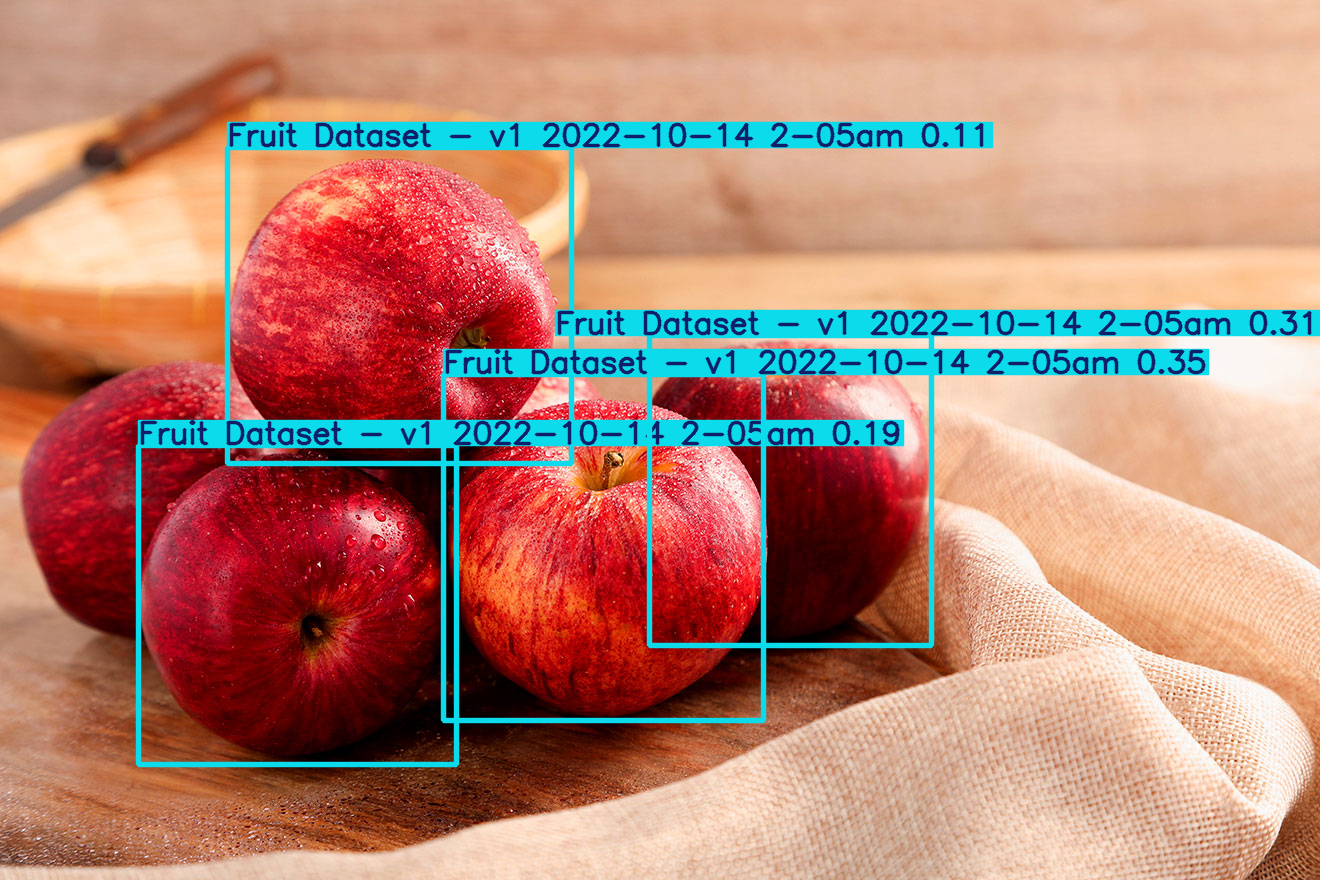

In [9]:
import cv2
from google.colab.patches import cv2_imshow

results = model.predict("/content/frutas-afe.jpg", conf=0.1)
cv2_imshow(results[0].plot())


---
## ✅ Conclusões

O modelo de visão computacional desenvolvido neste projeto foi capaz de detectar e classificar frutas
com base em imagens. A utilização do YOLO permitiu alta precisão e velocidade de detecção.

**Pontos de melhoria possíveis:**
- Expandir o dataset com novas frutas e condições de iluminação;
- Aplicar *data augmentation* para robustez do modelo;
- Comparar o desempenho com outras arquiteturas como MobileNet ou EfficientDet;
- Implementar uma interface gráfica para uso em tempo real.

---
